# Score de esfuerzo

## Cargado y analisis de los datos

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
df = pd.read_csv('MarathonData.csv')
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [40]:
df.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [41]:
df.isna().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [42]:
df[df['Wall21'].str.contains('-')]

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
25,26,Prague17,Jan Ro?ek,NaN,23.8,13.471698,ciclista 5h,-,3.11,B
34,35,Prague17,Pavel MarekPavel Marek,NaN,112.2,11.276382,NaN,-,3.22,B
51,52,Prague17,Jrom GOJIRIEN,NaN,70.7,12.662687,NaN,-,3.45,C
53,54,Prague17,Jakub Adam،k,NaN,51.1,11.230769,NaN,-,3.47,C
73,74,Prague17,Pavel Szappanos,NaN,53.6,12.711462,NaN,-,3.75,D
80,81,Prague17,C‚dou Gatto,NaN,38.1,11.043478,NaN,-,3.90,D


In [43]:
corr = df[['km4week', 'sp4week', 'MarathonTime']].corr()

<AxesSubplot:>

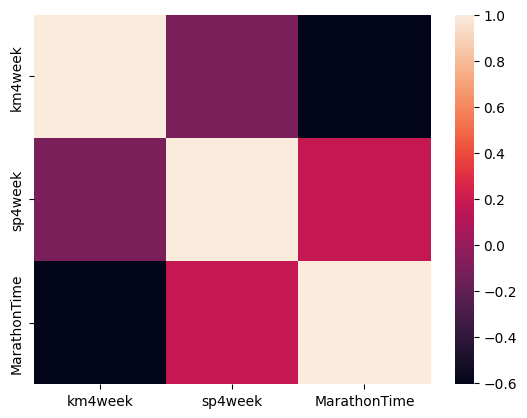

In [44]:
sns.heatmap(corr)

In [48]:
df['Score'] = df['km4week'] * df['sp4week'] 

In [49]:
df['Score']

0     1916.939131
1      938.065116
2     1118.140055
3     1685.549777
4     1179.751649
         ...     
82     541.516245
83     340.389950
84     611.792691
85     367.413333
86     194.187879
Name: Score, Length: 87, dtype: float64

## Limpieza de datos

Quitar datos de marathon

In [50]:
workingDf = df[~df['Wall21'].str.contains('-')]

In [51]:
workingDf

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,Score
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A,1916.939131
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A,938.065116
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A,1118.140055
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A,1685.549777
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A,1179.751649
...,...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D,541.516245
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D,340.389950
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D,611.792691
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D,367.413333


In [52]:
catsForModel = ["km4week", 'sp4week', 'Wall21', 'Score', 'MarathonTime']
workingDf = workingDf[catsForModel]

In [53]:
workingDf

,km4week,sp4week,Wall21,Score,MarathonTime
0,132.8,14.434783,1.16,1916.939131,2.37
1,68.6,13.674419,1.23,938.065116,2.59
2,82.7,13.520436,1.30,1118.140055,2.66
3,137.5,12.258544,1.32,1685.549777,2.68
4,84.6,13.945055,1.36,1179.751649,2.74
...,...,...,...,...,...
82,50.0,10.830325,2.02,541.516245,3.93
83,33.6,10.130653,1.94,340.389950,3.93
84,55.4,11.043189,1.94,611.792691,3.94
85,33.2,11.066667,2.05,367.413333,3.95


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Preprocesamiento: Rellenar NaN con valores promedio (si es necesario)
marathon_data = workingDf.fillna(workingDf.mean())

# Seleccionar las columnas para entrenamiento
X = marathon_data[['km4week', 'sp4week', 'Wall21', 'Score']].values  # Variables independientes
y = marathon_data['MarathonTime'].values  # Variable dependiente

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Ejemplo de predicción
example_data = np.array([[100, 14, 1.2, 1400]])  # Ejemplo de km4week, sp4week, Wall21
predicted_time = model.predict(example_data)
print(f"Predicted Marathon Time: {predicted_time[0]} hours")


Mean Squared Error: 0.004752983138337585
Predicted Marathon Time: 2.49111333295499 hours


C:\Users\Alien Ware\AppData\Local\Temp\ipykernel_10356\1930987686.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  marathon_data = workingDf.fillna(workingDf.mean())
